# Variable Exploration
I'll explore variables present in datasets as well as any external data I can find

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import os, sys

#Import other files
raw_path = os.path.join('..', 'data', 'raw')
proc_path = os.path.join('..', 'data', 'processed')
sys.path.append(os.path.join('..', 'src'))
from viz.Correl import *
%matplotlib inline  

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [4]:
#Read in data from Kaggle
reg_detail = pd.read_csv(os.path.join(raw_path, 'RegularSeasonDetailedResults.csv'))
teams = pd.read_csv(os.path.join(raw_path, 'Teams.csv'))
# w_teams = teams.rename(index=str, columns={'Team_Name': "Wteam_Name"})
# l_teams = teams.rename(index=str, columns={'Team_Name': "Lteam_Name"})
# reg_season = pd.merge(reg_detail, w_teams, left_on='Wteam', right_on='Team_Id').drop(['Team_Id', 'Wteam'], 1)
# reg_season = pd.merge(reg_season, l_teams, left_on='Lteam', right_on='Team_Id').drop(['Team_Id', 'Lteam'], 1)
reg_season = reg_detail.rename(index=str, columns={'Wteam':'Wteam_Name', 'Lteam':'Lteam_Name'})
reg_season

,Season,Daynum,Wteam_Name,Wscore,Lteam_Name,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
5,2003,11,1458,81,1186,55,H,0,26,57,...,11,12,17,6,22,8,19,4,3,25
6,2003,12,1161,80,1236,62,H,0,23,55,...,15,20,28,9,21,11,30,10,4,28
7,2003,12,1186,75,1457,61,N,0,28,62,...,17,17,23,8,25,10,15,14,8,18
8,2003,12,1194,71,1156,66,N,0,28,58,...,18,12,27,13,26,13,25,8,2,18
9,2003,12,1458,84,1296,56,H,0,32,67,...,14,7,12,9,23,10,18,1,3,18


# Section 1: Regular Season Performance
I'll try to find variables for the following dimensions: Pace, Off/Def Efficiency, strength of schedule, success on road, 3 pt offense/defense, close game performance

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                All
Min           37.54
1Q            50.93
2Q            54.06
Mean          54.10
3Q            57.19
Max           74.79
Variance      22.07
Skew           0.09
n         258527.71


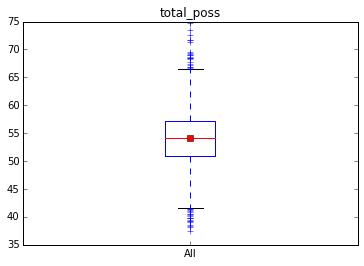

In [5]:
# Looking for Pace variables

#total possessions = (actual possessions - lost possesions)
# actual possessions = FGA - Off Rebounds + Blocks + Fouls resulting in FTs, but not and1 (proxy with FTA)
# lost possession = turnovers

master_pace = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    pace_w = season_games[['Wteam_Name', 'Season', 'Wtotal_poss']].rename(index=str, columns={'Wteam_Name':'Team', 'Wtotal_poss':'total_poss'})
    pace_l = season_games[['Lteam_Name', 'Season', 'Ltotal_poss']].rename(index=str, columns={'Lteam_Name':'Team', 'Ltotal_poss':'total_poss'})
    pace = pace_w.append(pace_l).reset_index(drop=True)
    master_pace = master_pace.append(pace).reset_index(drop=True)
    
pace_agg = master_pace.groupby(['Team', 'Season'])[['total_poss']].mean().reset_index()

desc_stats({'All':pace_agg}, 'total_poss')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


               All
Min           5.44
1Q            8.82
2Q            9.76
Mean          9.84
3Q           10.76
Max          16.39
Variance      2.18
Skew          0.34
n         47030.36


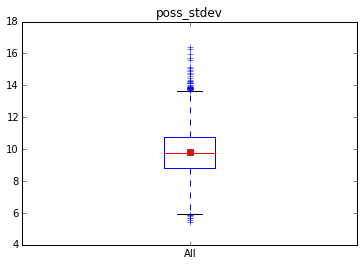

In [17]:
# Looking for consistency of Pace variables

#total possessions = (actual possessions - lost possesions)
# actual possessions = FGA - Off Rebounds + Blocks + Fouls resulting in FTs, but not and1 (proxy with FTA)
# lost possession = turnovers

master_pace = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    pace_w = season_games[['Wteam_Name', 'Season', 'Wtotal_poss']].rename(index=str, columns={'Wteam_Name':'Team', 'Wtotal_poss':'total_poss'})
    pace_l = season_games[['Lteam_Name', 'Season', 'Ltotal_poss']].rename(index=str, columns={'Lteam_Name':'Team', 'Ltotal_poss':'total_poss'})
    pace = pace_w.append(pace_l).reset_index(drop=True)
    master_pace = master_pace.append(pace).reset_index(drop=True)
    
pace_stdev = master_pace.groupby(['Team', 'Season'])[['total_poss']].std().reset_index()
pace_stdev = pace_stdev.rename(index=str, columns={'total_poss':'poss_stdev'})

desc_stats({'All':pace_stdev}, 'poss_stdev')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

              All
Min          0.46
1Q           0.88
2Q           0.94
Mean         0.93
3Q           0.97
Max          1.50
Variance     0.01
Skew        -0.58
n         4442.75


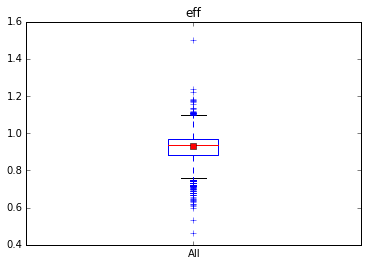

In [6]:
# Looking for Offensive Efficiency

# points per possession = points scored / possessions

master_oeff = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    season_games['Woff_eff'] = [pts / poss for pts, poss in zip(season_games['Wscore'], season_games['Wtotal_poss'])]
    season_games['Loff_eff'] = [pts / poss for pts, poss in zip(season_games['Lscore'], season_games['Ltotal_poss'])]

    eff_w = season_games[['Wteam_Name', 'Season', 'Woff_eff']].rename(index=str, columns={'Wteam_Name':'Team', 'Woff_eff':'eff'})
    eff_l = season_games[['Lteam_Name', 'Season', 'Loff_eff']].rename(index=str, columns={'Lteam_Name':'Team', 'Loff_eff':'eff'})
#    eff = eff_w.append(eff_l).reset_index(drop=True)
    master_oeff = master_oeff.append(eff_w).append(eff_l).reset_index(drop=True)

oeff_agg = master_oeff.groupby(['Team', 'Season']).mean().reset_index()

desc_stats({'All':oeff_agg}, 'eff')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

              All
Min          0.42
1Q           0.88
2Q           0.94
Mean         0.93
3Q           1.00
Max          1.86
Variance     0.01
Skew        -0.57
n         4451.19


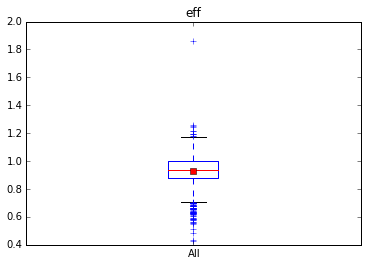

In [7]:
# Looking for Defensive Efficiency

# points per possession = points scored / possessions

master_deff = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    season_games['Loff_eff'] = [pts / poss for pts, poss in zip(season_games['Wscore'], season_games['Wtotal_poss'])]
    season_games['Woff_eff'] = [pts / poss for pts, poss in zip(season_games['Lscore'], season_games['Ltotal_poss'])]

    eff_w = season_games[['Wteam_Name', 'Season', 'Woff_eff']].rename(index=str, columns={'Wteam_Name':'Team', 'Woff_eff':'eff'})
    eff_l = season_games[['Lteam_Name', 'Season', 'Loff_eff']].rename(index=str, columns={'Lteam_Name':'Team', 'Loff_eff':'eff'})
#    eff = eff_w.append(eff_l).reset_index(drop=True)
    master_deff = master_deff.append(eff_w).append(eff_l).reset_index(drop=True)

deff_agg = master_deff.groupby(['Team', 'Season']).mean().reset_index()

desc_stats({'All':deff_agg}, 'eff')

              All
Min          0.00
1Q           0.36
2Q           0.50
Mean         0.49
3Q           0.63
Max          1.00
Variance     0.04
Skew        -0.05
n         2360.47


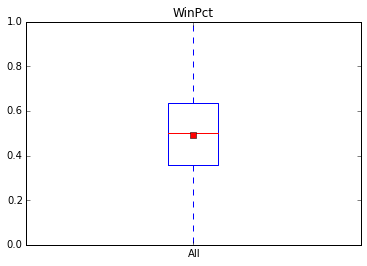

In [8]:
# Looking for strength of schedule

#SOS = win_pct of teams they play * 2/3 + 1/3 * win_pct of team the teams play

#Gets win percentage of each team
win_pct = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    team_win_pct = pd.DataFrame()
    for team in list(set(games['Lteam_Name'].values) | set(games['Wteam_Name'].values)):
        wins = len(games[games['Wteam_Name']==team])
        losses = len(games[games['Lteam_Name']==team])
        team_win_pct.set_value(team, 'WinPct', 1.0*wins/(wins+losses))
    team_win_pct['Season'] = s
    team_win_pct = team_win_pct.reset_index()
    team_win_pct = team_win_pct.reset_index().rename(index=str, columns={'index':'Team'})
    win_pct = win_pct.append(team_win_pct).reset_index(drop=True)

desc_stats({'All':win_pct}, 'WinPct')

              All
Min          0.34
1Q           0.46
2Q           0.49
Mean         0.50
3Q           0.54
Max          0.65
Variance     0.00
Skew         0.12
n         2382.43


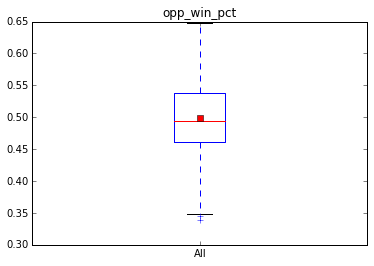

In [9]:
#Gets win percentage of opponents
opp_win_pct = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    for team in list(set(games['Lteam_Name'].values) | set(games['Wteam_Name'].values)):
        opp_l = games[games['Lteam_Name']==team][['Wteam_Name']].rename(index=str, columns={'Wteam_Name':'Team'})
        opp_w = games[games['Wteam_Name']==team][['Lteam_Name']].rename(index=str, columns={'Lteam_Name':'Team'})
        opp = opp_l.append(opp_w).reset_index(drop=True)
        opp['Season'] = s
        opp_records = opp.merge(win_pct, on=['Season', 'Team'], how='inner')
        opp_avg_records = opp_records['WinPct'].mean()
        opp_win_pct.set_value(idx, 'Team', team)
        opp_win_pct.set_value(idx, 'Season', s)
        opp_win_pct.set_value(idx, 'opp_win_pct', opp_avg_records)
        idx += 1
        
desc_stats({'All':opp_win_pct}, 'opp_win_pct')        

              All
Min          0.43
1Q           0.48
2Q           0.49
Mean         0.50
3Q           0.52
Max          0.57
Variance     0.00
Skew         0.25
n         2384.88


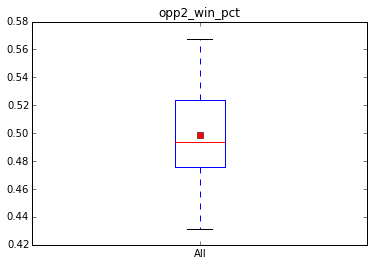

In [10]:
#Gets win percentage of opponents opponents
opp2_win_pct = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    for team in list(set(games['Lteam_Name'].values) | set(games['Wteam_Name'].values)):
        opp_l = games[games['Lteam_Name']==team][['Wteam_Name']].rename(index=str, columns={'Wteam_Name':'Team'})
        opp_w = games[games['Wteam_Name']==team][['Lteam_Name']].rename(index=str, columns={'Lteam_Name':'Team'})
        opp = opp_l.append(opp_w).reset_index(drop=True)
        opp['Season'] = s
        opp2_records = opp.merge(opp_win_pct, on=['Season', 'Team'], how='inner')
        opp2_avg_records = opp2_records['opp_win_pct'].mean()
        opp2_win_pct.set_value(idx, 'Team', team)
        opp2_win_pct.set_value(idx, 'Season', s)
        opp2_win_pct.set_value(idx, 'opp2_win_pct', opp2_avg_records)
        idx += 1
        
desc_stats({'All':opp2_win_pct}, 'opp2_win_pct')    

              All
Min          0.38
1Q           0.47
2Q           0.49
Mean         0.50
3Q           0.53
Max          0.62
Variance     0.00
Skew         0.18
n         2383.24


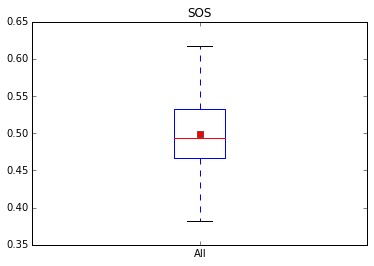

In [11]:
#Compiles SOS metric
sos_agg = pd.DataFrame()
sos_agg['Team'] = win_pct['Team']
sos_agg['Season'] = win_pct['Season']
sos_agg['SOS'] = [(2.0/3.0)*o + (1.0/3.0)*oo for o, oo in zip(opp_win_pct['opp_win_pct'], opp2_win_pct['opp2_win_pct'])]

desc_stats({'All':sos_agg}, 'SOS')    

              All
Min         -0.37
1Q           0.17
2Q           0.29
Mean         0.28
3Q           0.40
Max          1.00
Variance     0.03
Skew        -0.01
n         1348.63


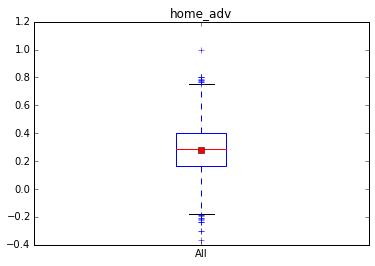

In [12]:
# Looking for success on road

#Win percentage difference when at road or at neutral vs when at home

team_home_adv = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    for team in list(set(games['Lteam_Name'].values) | set(games['Wteam_Name'].values)):
        #When at home
        wins_h = len(games[(games['Wteam_Name']==team) & (games['Wloc']=='H')])
        losses_h = len(games[(games['Lteam_Name']==team) & (games['Wloc']=='A')])
        if (wins_h + losses_h)==0:
            home_pct = 0
        else:
            home_pct = 1.0*wins_h/(wins_h+losses_h)
        #When away or in neutral
        wins_a = len(games[(games['Wteam_Name']==team) & (games['Wloc'].isin(['A', 'N']))])
        losses_a = len(games[(games['Lteam_Name']==team) & (games['Wloc'].isin(['H', 'N']))]) 
        away_pct = 1.0*wins_a/(wins_a+losses_a)
        team_home_adv.set_value(idx, 'Team', team)
        team_home_adv.set_value(idx, 'Season', s)
        team_home_adv.set_value(idx, 'home_adv', home_pct - away_pct)
        idx += 1

desc_stats({'All':team_home_adv}, 'home_adv')


             All
Min         0.06
1Q          0.16
2Q          0.19
Mean        0.19
3Q          0.21
Max         0.35
Variance    0.00
Skew        0.42
n         902.08


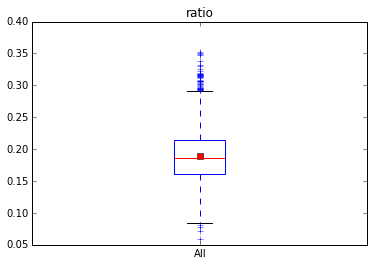

In [13]:
# Looking for 3 point offense

# 3pt offense = (3 pointers made / (all shots made + shots resulting in FT)
reg_season['W32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Wfgm3'], reg_season['Wfgm'], reg_season['Wfta'])]
reg_season['L32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Lfgm3'], reg_season['Lfgm'], reg_season['Lfta'])]

W3p = reg_season[['Wteam_Name', 'Season',  'W32Ratio']].rename(index=str, columns={'Wteam_Name':'Team', 'W32Ratio':'ratio'})
L3p = reg_season[['Lteam_Name', 'Season', 'L32Ratio']].rename(index=str, columns={'Lteam_Name':'Team', 'L32Ratio':'ratio'})
o3P = W3p.append(L3p).reset_index(drop=True)

o3P_agg = o3P.groupby(['Team', 'Season'])[['ratio']].mean().reset_index()

desc_stats({'All':o3P_agg}, 'ratio')

             All
Min         0.10
1Q          0.17
2Q          0.19
Mean        0.19
3Q          0.21
Max         0.32
Variance    0.00
Skew        0.32
n         900.92


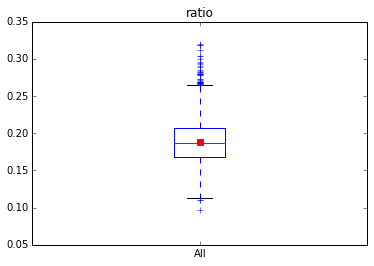

In [14]:
# Looking for 3 point defense

# 3pt offense = (3 pointers made / (all FG made + shots resulting in FT)
reg_season['L32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Wfgm3'], reg_season['Wfgm'], reg_season['Wfta'])]
reg_season['W32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Lfgm3'], reg_season['Lfgm'], reg_season['Lfta'])]

W3p = reg_season[['Wteam_Name', 'Season', 'W32Ratio']].rename(index=str, columns={'Wteam_Name':'Team', 'W32Ratio':'ratio'})
L3p = reg_season[['Lteam_Name', 'Season', 'L32Ratio']].rename(index=str, columns={'Lteam_Name':'Team', 'L32Ratio':'ratio'})
d3P = W3p.append(L3p).reset_index(drop=True)

d3P_agg = d3P.groupby(['Team', 'Season'])[['ratio']].mean().reset_index()

desc_stats({'All':d3P_agg}, 'ratio')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


            All
Min       -0.96
1Q        -0.17
2Q         0.00
Mean       0.01
3Q         0.18
Max        1.00
Variance   0.07
Skew       0.05
n         25.20


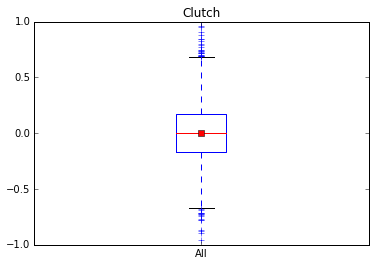

In [15]:
# Looking at close game performance

#Difference Win percentage when games are within 5 points or go to OT vs other scenarios

team_clutch_win = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    games['Score_Diff'] = [w-l for w,l in zip(games['Wscore'], games['Lscore'])]
    games_close = games[(games['Score_Diff']<=5) | (games['Numot']>0)]
    games_non_close = games[(games['Score_Diff']>5) & (games['Numot']==0)]
    
    for team in list(set(games['Lteam_Name'].values) | set(games['Wteam_Name'].values)):
        wins_close = len(games_close[games_close['Wteam_Name']==team])
        losses_close = len(games_close[games_close['Lteam_Name']==team])
        if (wins_close+losses_close) == 0:
            close_pct = 0
        else:
            close_pct = 1.0*wins_close/(wins_close + losses_close)
        
        wins_non_close = len(games_non_close[games_non_close['Wteam_Name']==team])
        losses_non_close = len(games_non_close[games_non_close['Lteam_Name']==team])
        non_close_pct = 1.0*wins_non_close/(wins_non_close + losses_non_close)
        
        team_clutch_win.set_value(idx, 'Team', team)
        team_clutch_win.set_value(idx, 'Season', s)
        team_clutch_win.set_value(idx, 'Clutch', close_pct - non_close_pct)
        idx += 1

desc_stats({'All':team_clutch_win}, 'Clutch')

In [18]:
#combines all features into one file
features = pace_agg
print len(features)
features = features.merge(pace_stdev, on=['Team', 'Season'])
print len(features)
features = features.merge(oeff_agg, on=['Team', 'Season'])
print len(features)
features = features.merge(deff_agg, on=['Team', 'Season'])
print len(features)
features = features.rename(index=str, columns={'eff_x':'oeff', 'eff_y':'deff'})
features = features.merge(sos_agg, on=['Team', 'Season'])
print len(features)
features = features.merge(team_home_adv, on=['Team', 'Season'])
print len(features)
features = features.merge(o3P_agg, on=['Team', 'Season'])
print len(features)
features = features.merge(d3P_agg, on=['Team', 'Season'])
print len(features)
features = features.rename(index=str, columns={'ratio_x':'o3P', 'ratio_y':'d3P'})
features = features.merge(win_pct[['Team', 'Season', 'WinPct']], on=['Team', 'Season'])
print len(features)
features = features.merge(team_clutch_win, on=['Team', 'Season'])
print len(features)

4779
4779
4779
4779
4779
4779
4779
4779
4779
4779


In [19]:
features.to_csv(os.path.join(proc_path, 'team_features.csv'), index=False)